# 5xFAD Resting State Analysis

In [1]:
import os
import pickle
import scienceplots
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import zscore
from scipy.spatial.distance import pdist, squareform

plt.style.use(['science', 'grid'])
plt.rc('figure', titlesize = 33, figsize = (21, 7), dpi = 210)
plt.rc('axes', titlesize = 27, labelsize = 21, titlepad = 21)
plt.rc('xtick', labelsize = 17)
plt.rc('ytick', labelsize = 17)

In [2]:
source = '/Volumes/STORAGE 1.0/UNIC Research/5xFAD Resting State'
channels = [3, 4, 5, 6, 7, 8]
sampling_rate = 30000
output = '/Users/fomo/Documents/Research/UNIC Research/Motor Evoked Potentials/resting state analysis'

In [111]:
import importlib
import openephysextract.extractor
import openephysextract.preprocess
import openephysextract.progress
import openephysextract.trial

importlib.reload(openephysextract.extractor)
importlib.reload(openephysextract.progress)
importlib.reload(openephysextract.trial)
importlib.reload(openephysextract.preprocess)

<module 'openephysextract.preprocess' from '/Users/fomo/Documents/Kaizen/code/motor-evoked-potentials/openephysextract/preprocess.py'>

## preprocessing

In [78]:
from openephysextract.extractor import Extractor  

extractor = Extractor(
    source = source,
    channels = channels,
    sampling_rate = sampling_rate,
    output = output,
)

extracted = extractor.extractify(export = True)

Extracting Trials:   0%|                                                                                      …

In [98]:
with open(os.path.join(output, 'raw_data.pkl'), 'rb') as f:
    extracted = pickle.load(f)

In [112]:
from openephysextract.preprocess import Preprocessor

preprocessor = Preprocessor(
    trials = extracted,
    remove_bad_channels = True
)

preprocessed = preprocessor.preprocess(export = True)

Preprocessing:   0%|                                                                                          …

In [113]:
test = preprocessed[0]

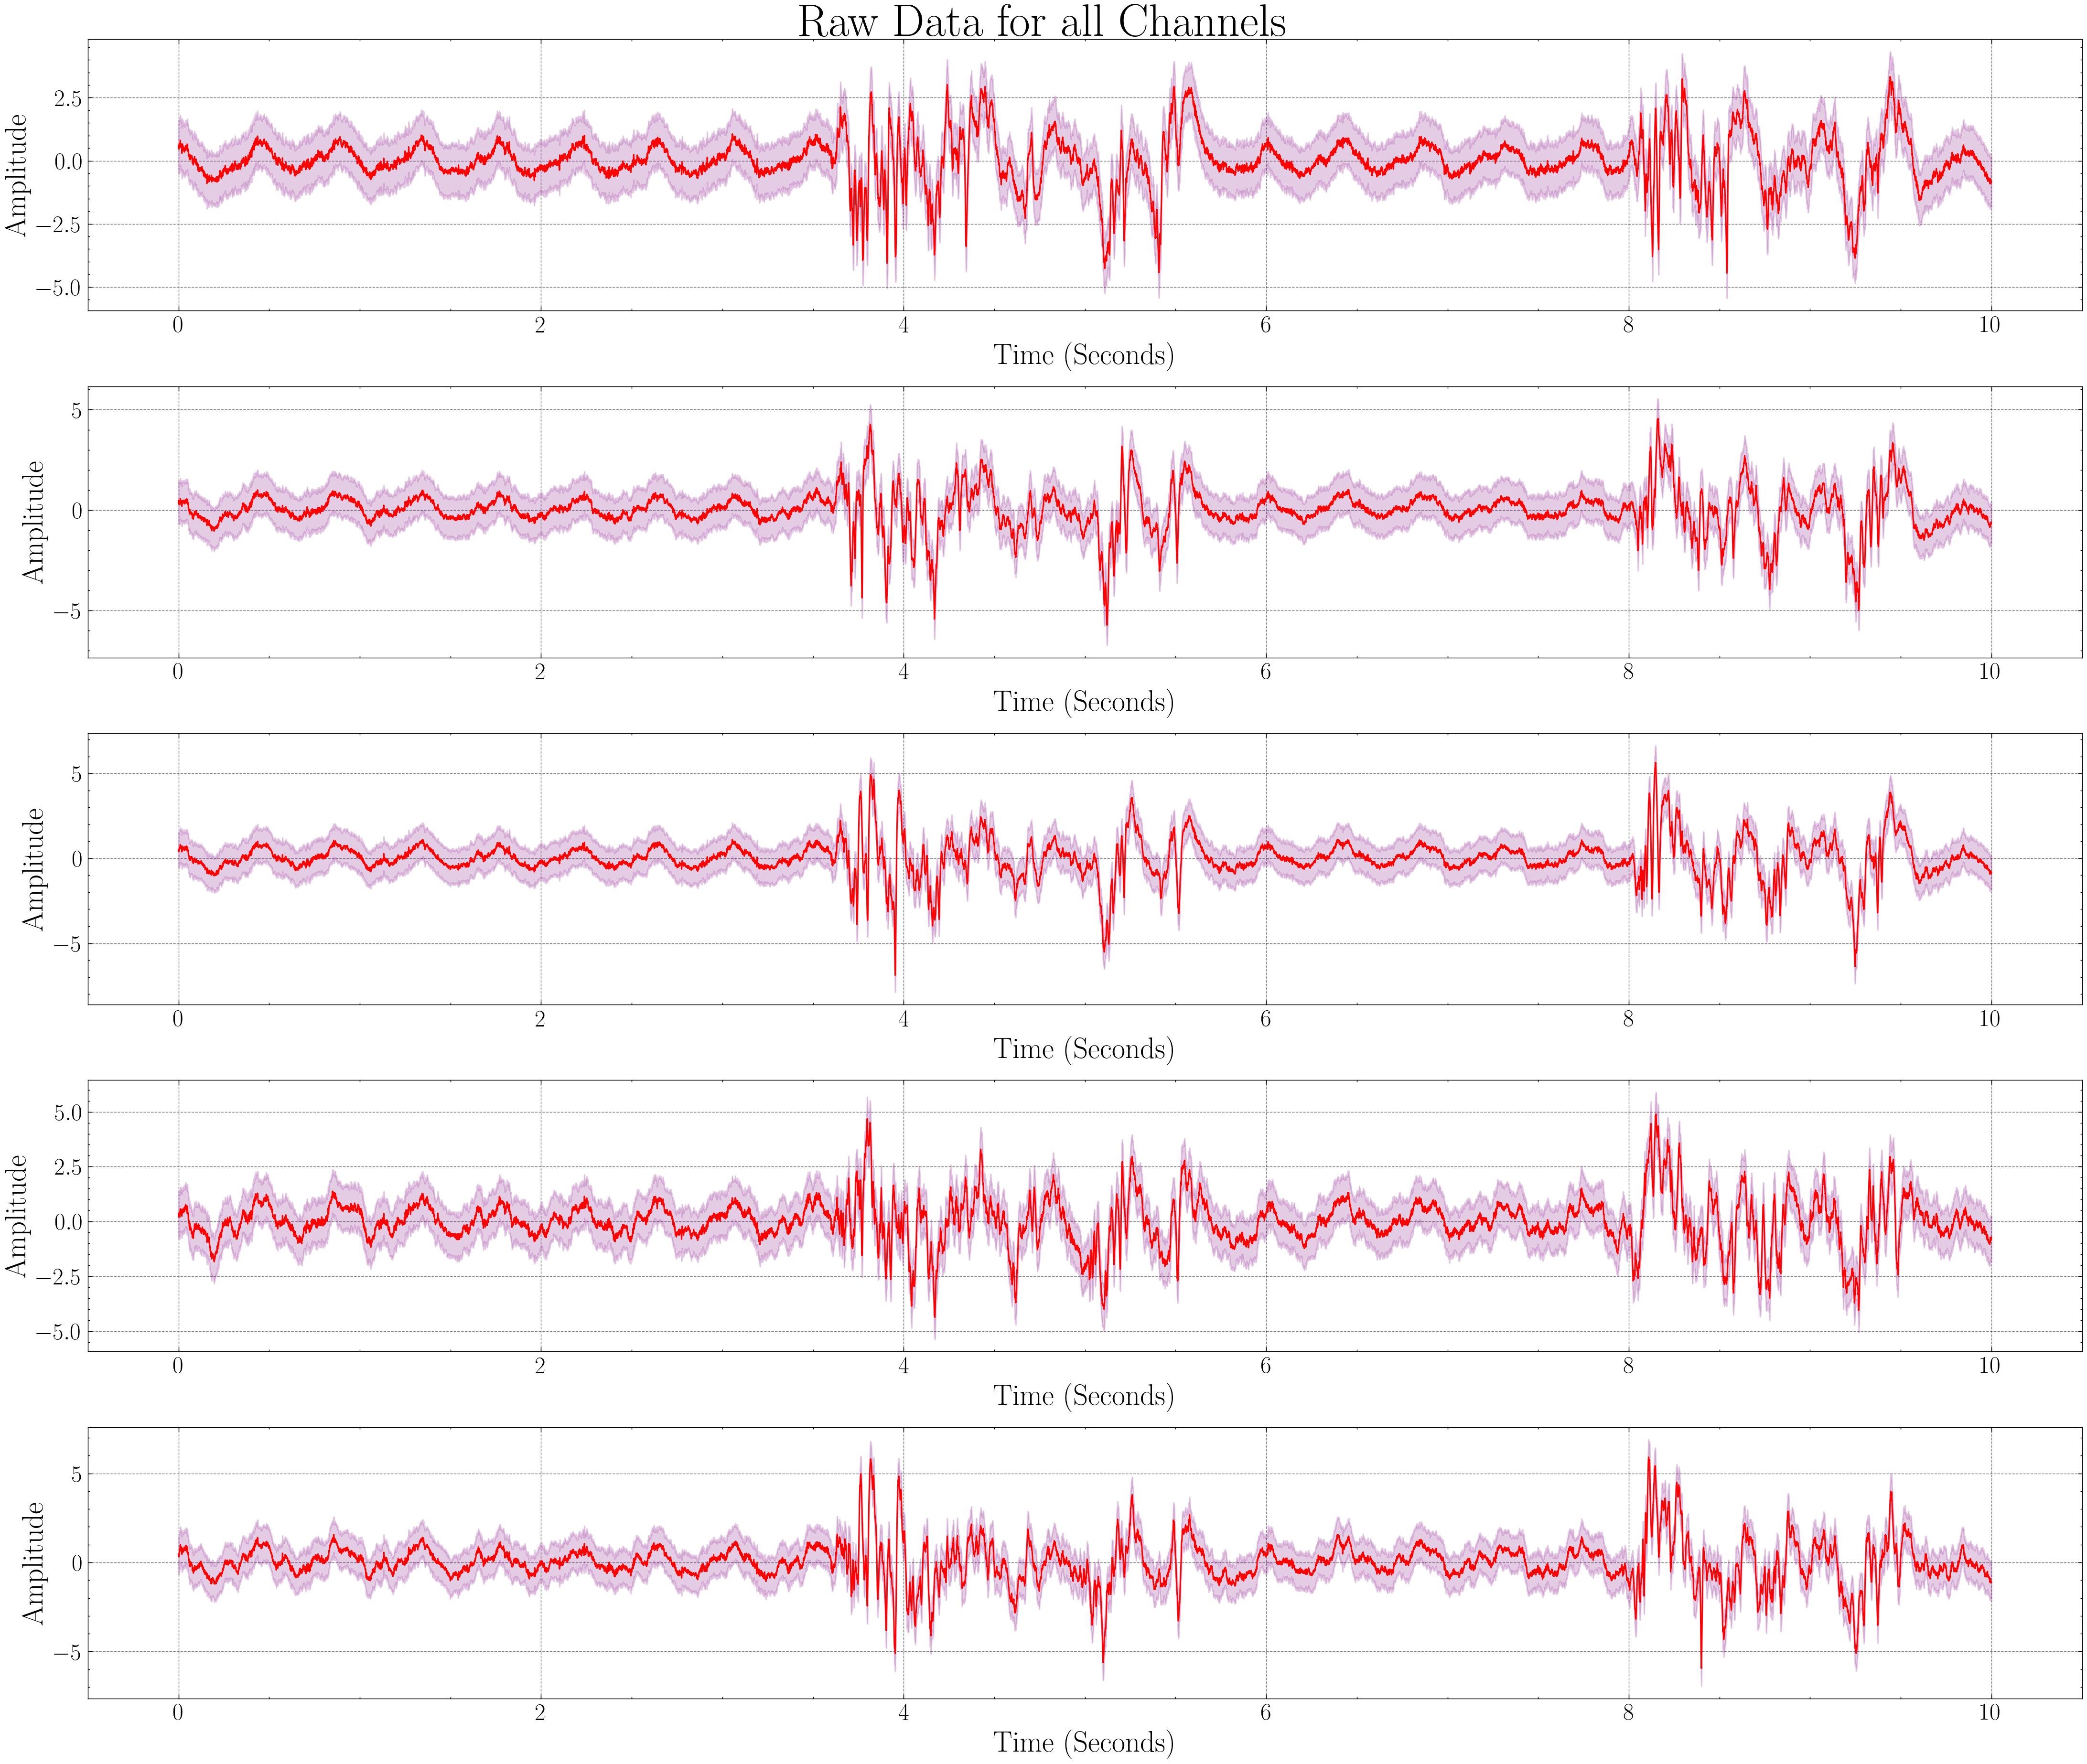

In [115]:
def plotify(extract, start, stop):
    
    n = extract.shape[0]
    
    fig, axs = plt.subplots(n, 1, figsize=(21, n*3 + 3), sharex = False)

    for i in range(n):
        
        start = 0
        stop = 10*30000
        
        test_z = (extract[i, start:stop] - extract[i, :].mean())/ extract[i, :].std()
        test_z = gaussian_filter1d(test_z, sigma = 7)

        time_axis_ms = np.arange(len(test_z)) / 30000 + start / 30000

        axs[i].plot(time_axis_ms, test_z, color = 'red')
        axs[i].fill_between(
            time_axis_ms, test_z - 1, test_z + 1, color = 'purple', alpha = 0.2
        )
        axs[i].set_xlabel('Time (Seconds)')
        axs[i].set_ylabel('Amplitude')

    fig.suptitle('Raw Data for all Channels')
    plt.tight_layout()
    plt.show()
    
plotify(test_extract, start = 0.2*(10**7), stop = 0.4*(10**7))